Meshi Ben Oz
id: 207287566

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 

Question 1

A. Both covariance and correlation measure the relationship and dependency between two variables. 
Covariance indicates the direction of the linear relationship between variables, which can be positive: both variables increase or decrease together, or negative: one variable increases while the other decreases. 
In the calculation, the difference between the value and the mean of the variable is calculated for each observation, and these differences are multiplied for the two variables. The sum of these products is then divided by the sample size or, in the case of a sample covariance, by n−1.

Correlation, on the other hand, measures both the strength and direction of the linear relationship, with values closer to ±1 indicating a stronger relationship.
To calculate correlation, the covariance between the two variables is divided by the multiplication of their standard deviations.


In [2]:
# Load the data frame
iris_dataset_path = "/Users/meshibenoz/Desktop/Msater/Semester A/Python workshop/projects/mini project 1/iris.csv"
df = pd.read_csv(iris_dataset_path)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# Cleaning the data frame
df.isna().any() # no missing values were found
if df.duplicated().any(): # check and drop duplicates if needed
    df.drop_duplicates(inplace=True)

# Drop irelevant columns
df_dropped = df.drop(columns=['Id'], inplace=True)

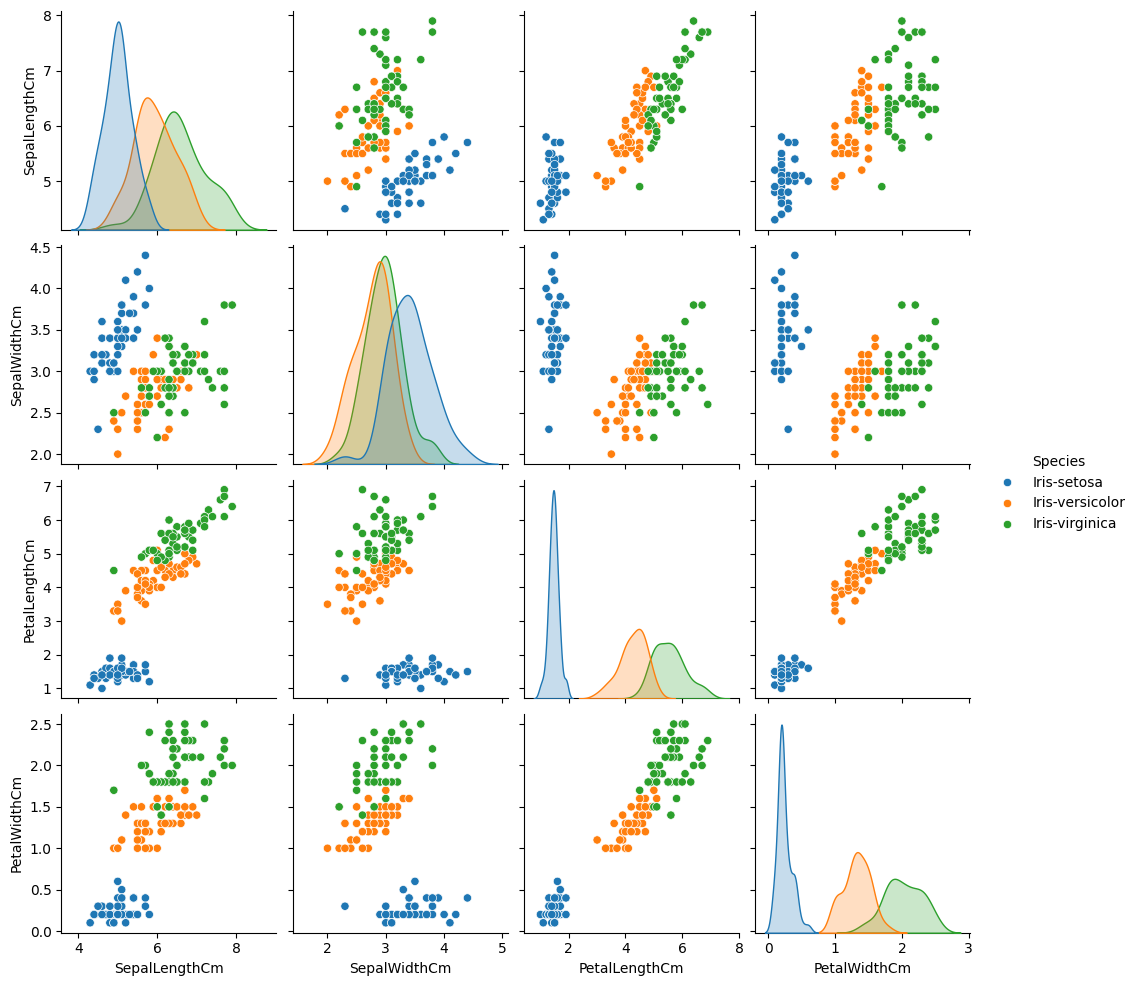

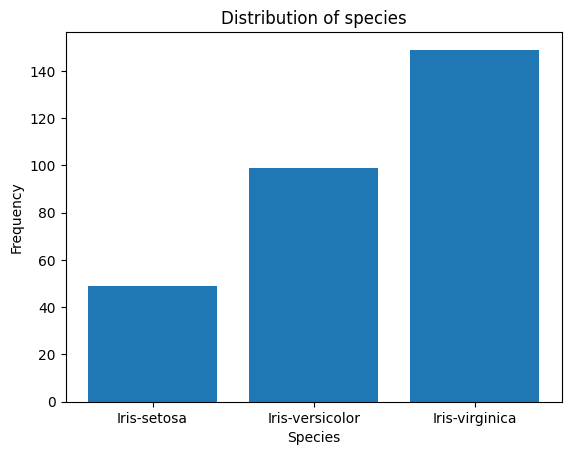

In [ ]:
# Exploring the data
df.describe()

# plots for features distributions and correlations
sb.pairplot(df, hue='Species')
plt.show()

# Distribution of the iris species
plt.bar(df['Species'].values, df['Species'].index)
plt.xlabel("Species")
plt.ylabel("Frequency")
plt.title("Distribution of species")
plt.show()

In [6]:
# A function to calculate the covariance between two variables
def calcCov(x, y):
    # calculating the mean for each variable
    x_mean = x.mean()
    y_mean = y.mean()
    total_sum = 0
    sample_size = len(x) 
    '''
    calculating the sum that consists from:
    multiplication of the difference between each value and the mean of it's variable
    '''
    for i in range(sample_size):
        total_sum += (x[i] - x_mean)*(y[i] - y_mean) 
    cov = (total_sum/sample_size) # covariance: deviding the sum with the sample size
    return cov

In [7]:
# A function to compute the Covariance matrix
# covMat(data) should return an n by n covariance matrix, where n is the number of features (in case of the iris dataset n=4)
def covMat(data):
    # filtering the relevant columns for the matrix from the data frame
    selected_columns_indices = [index for index, col in enumerate(data.columns) 
                                if data[col].dtype != 'object']  # indices of the numeric columns
    
    filtered_df = data.iloc[:, selected_columns_indices]
    features_number = len(selected_columns_indices) # determine the shape of the covariance matrix n by n (n=4)
    cov_matrix = np.zeros((features_number, features_number)) # initialize matrix in the desired shape
    
    # calculating the covariance between all the variables and insert the result into the matrix
    for row in range(features_number):
        for column in range(features_number):
            covariance = calcCov(filtered_df.iloc[:, row], filtered_df.iloc[:, column]) # calculate the covariance between two variables
            cov_matrix[row,column] = covariance # insert the result into the matrix in the spesific location
    return cov_matrix

In [8]:
# Test1: compare the results of the function with NumPy's function
print("Numpy's covariance matrix:")
filtered_df = df.iloc[:, [0,1,2,3]]
print(np.cov(filtered_df,bias=True, rowvar=False))
print("----------------------------------------------------")
print("covMat() covariance matrix:")
print(covMat(df))

Numpy's covariance matrix:
[[ 0.68112222 -0.03900667  1.26519111  0.51345778]
 [-0.03900667  0.18675067 -0.319568   -0.11719467]
 [ 1.26519111 -0.319568    3.09242489  1.28774489]
 [ 0.51345778 -0.11719467  1.28774489  0.57853156]]
----------------------------------------------------
covMat() covariance matrix:
[[ 0.68112222 -0.03900667  1.26519111  0.51345778]
 [-0.03900667  0.18675067 -0.319568   -0.11719467]
 [ 1.26519111 -0.319568    3.09242489  1.28774489]
 [ 0.51345778 -0.11719467  1.28774489  0.57853156]]


In [9]:
# Using the covariance function, implement a function to calculate the correlation matrix
def corrMat(data):
  cov_matrix = covMat(data)
  size = len(cov_matrix) # set the correlation matrix size
  corr_matrix = np.zeros((size,size)) # initialize the correlation matrix
  
  # insert the correlation values into the new matrix
  for i in range(size):
    for j in range(size):
      sd = (np.std(data.iloc[:,i]) * np.std(data.iloc[:,j])) # calculate the standard deviation multiplication of the two variables
      corr_matrix[i][j] = (cov_matrix[i][j]) / sd # correlation: division of the covariance by the standard deviation multiplication
  return corr_matrix


In [10]:
# Test2: validate the correlation matrix implementation by comparing it with the results of NumPy's 
print("Numpy's correlation matrix")
print(np.corrcoef(filtered_df,rowvar=False))
print("---------------------------------------------------")
print("corMat() correlation Matrix:")
print(corrMat(df))

Numpy's correlation matrix
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]
---------------------------------------------------
corMat() correlation Matrix:
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


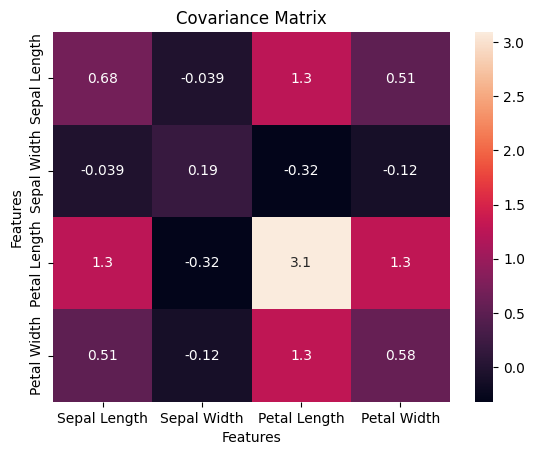

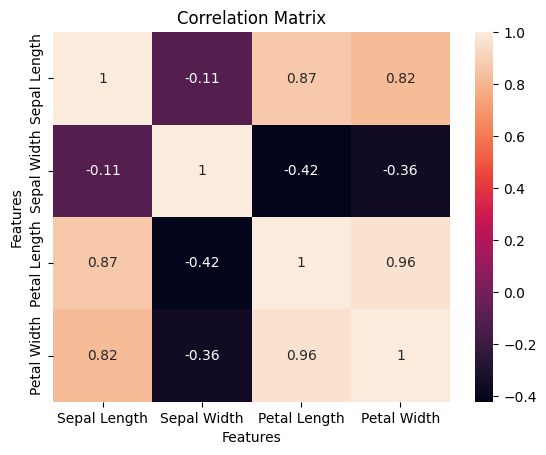

In [11]:
# Visualization of the tests resultss
# Covariance matrix
sb.heatmap(covMat(df), annot=True)
plt.title('Covariance Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks([0.5,1.5,2.5,3.5], ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
plt.yticks([0.5,1.5,2.5,3.5], ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
plt.show()

# Correlation matrix
sb.heatmap(corrMat(df), annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks([0.5,1.5,2.5,3.5], ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
plt.yticks([0.5,1.5,2.5,3.5], ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
plt.show()

Question 2

In [99]:
# Load the data frame
laptop_dataset_path = "/Users/meshibenoz/Desktop/Msater/Semester A/Python workshop/projects/mini project 1/laptop_price - dataset.csv"
df2= pd.read_csv(laptop_dataset_path)
df2 

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.5,4,128GB SSD,Intel,HD Graphics 520,Windows 10,1.80,638.00
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.5,16,512GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1499.00
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel,Celeron Dual Core N3050,1.6,2,64GB Flash Storage,Intel,HD Graphics,Windows 10,1.50,229.00
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,6,1TB HDD,AMD,Radeon R5 M330,Windows 10,2.19,764.00


In [100]:
# Cleaning the data frame
df2.isna().any() # no missing values were found
if df2.duplicated().any(): # check and drop duplicates if needed
    df2.drop_duplicates(inplace=True)


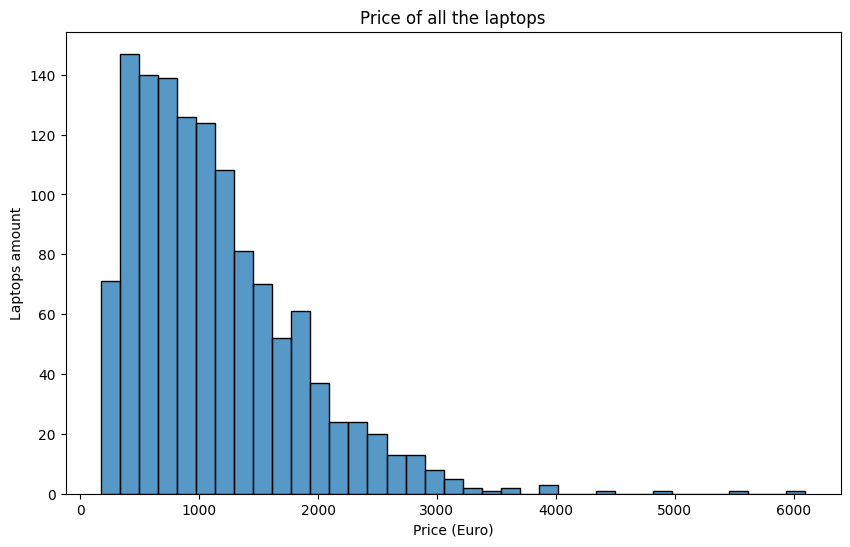

Average price per company: Company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price (Euro), dtype: float64
The most expensive average price is: 3346.14
For the company: Razer


In [101]:
'''
Plot the price of all the laptops
Which company has on average the most expensive laptop? What is the average laptop price for each company?
'''
# plot the price of all the laptops
plt.figure(figsize=(10, 6))
sb.histplot(df2["Price (Euro)"])
plt.title('Price of all the laptops')
plt.xlabel('Price (Euro)')
plt.ylabel('Laptops amount')
plt.show()

# Calculating the average laptop price per company
average_price_per_company = df2.groupby('Company')['Price (Euro)'].mean()
print(f"Average price per company: {average_price_per_company}")

# identify the company and the most expensive average price 
average_price_per_company_sorted = average_price_per_company.sort_values(ascending=False) # sorting the values in descending order
expensive_company = average_price_per_company_sorted.index[0] # extracting the most expensive price
expensive_price = average_price_per_company_sorted.iloc[0] # extracting company name
print(f"The most expensive average price is: {expensive_price:.2f}")
print(f"For the company: {expensive_company}")

Find the different types of Operating systems present in the data - under the column name "OpSys".
* Please note - there are operating systems that are the same systems and just written differently in the column - please fix them to be uniform.

OpSys
Windows 10      1048
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64


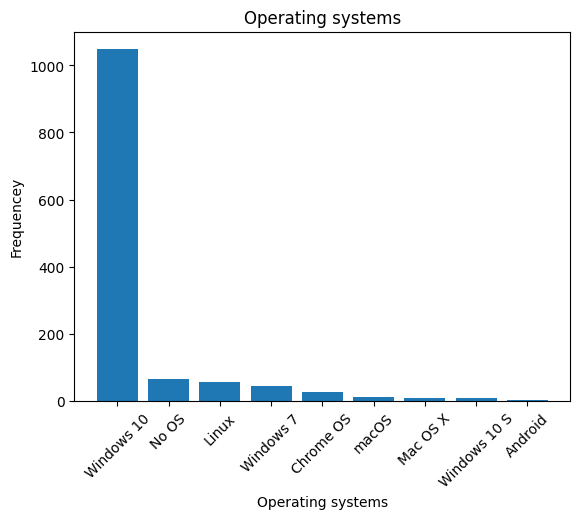

In [102]:
# checking and demonstrating the uniqe values of the operating system
filter = df2['OpSys'].value_counts()
print(filter)

# visualization before change
value_counts = df2["OpSys"].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.title('Operating systems')
plt.xlabel('Operating systems')
plt.ylabel('Frequencey')
plt.xticks(rotation=45)
plt.show()

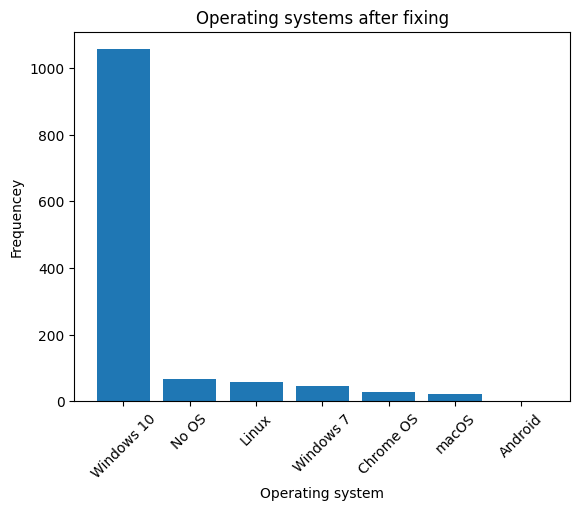

OpSys
Windows 10    1056
No OS           66
Linux           58
Windows 7       45
Chrome OS       27
macOS           21
Android          2
Name: count, dtype: int64


In [103]:
# fixing the operating system names to be uniform
df_fixed = df2
# replace the incorrect names to be uniformed
df_fixed['OpSys'] = df_fixed['OpSys'].replace({'Windows 10 S': 'Windows 10'})
df_fixed['OpSys'] = df_fixed['OpSys'].replace({'Mac OS X': 'macOS'})

# visualization
value_counts_fixed = df_fixed["OpSys"].value_counts()
plt.bar(value_counts_fixed.index, value_counts_fixed.values)
plt.title('Operating systems after fixing')
plt.xlabel('Operating system')
plt.ylabel('Frequencey')
plt.xticks(rotation=45)
plt.show()

# Testing that the changes are matching with the test before:
filter2 = df_fixed['OpSys'].value_counts()
print(filter2)

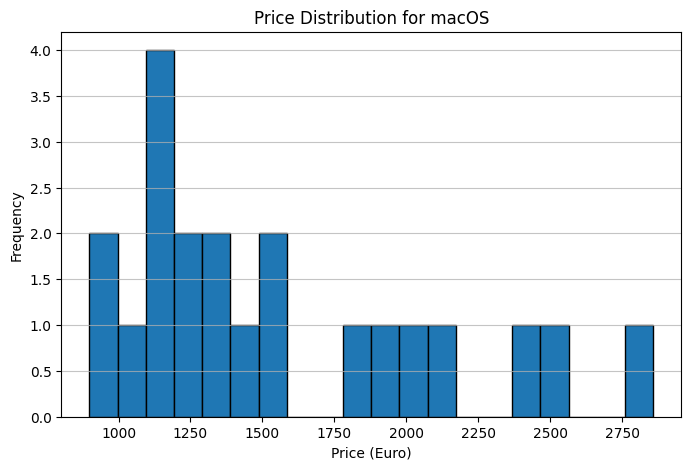

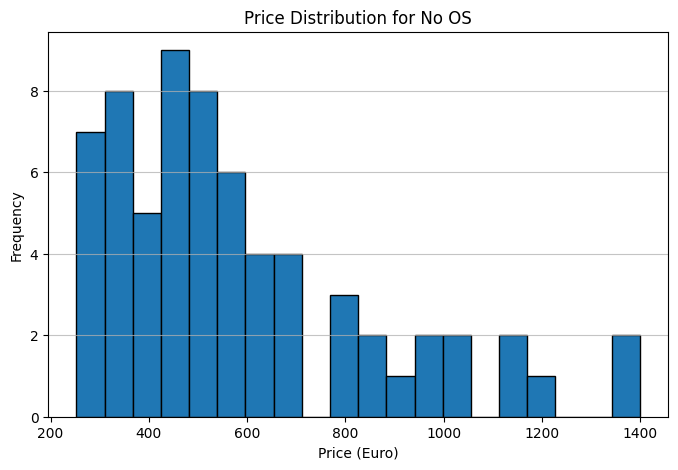

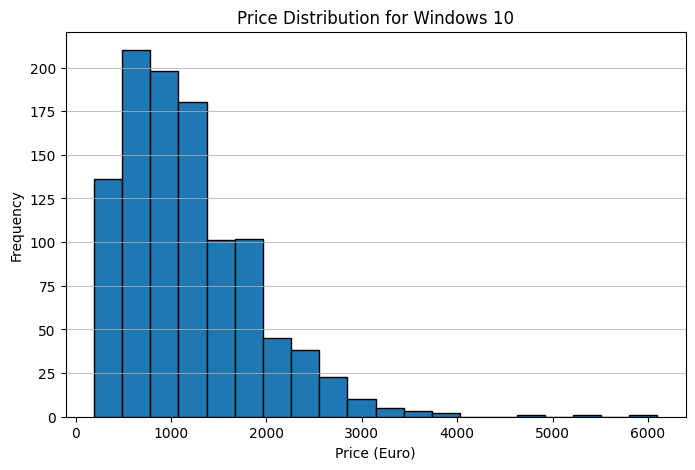

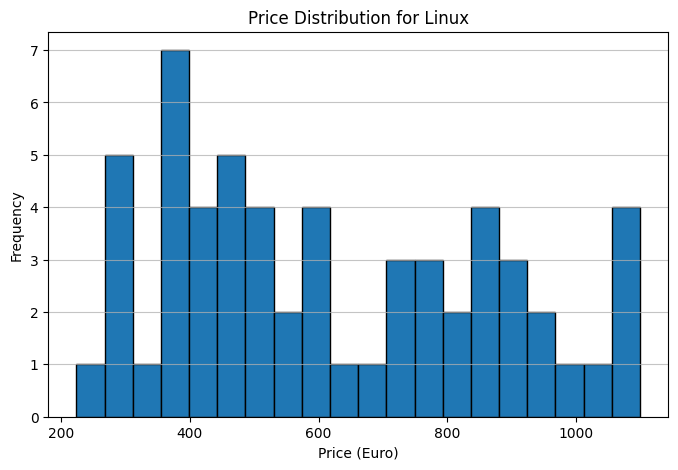

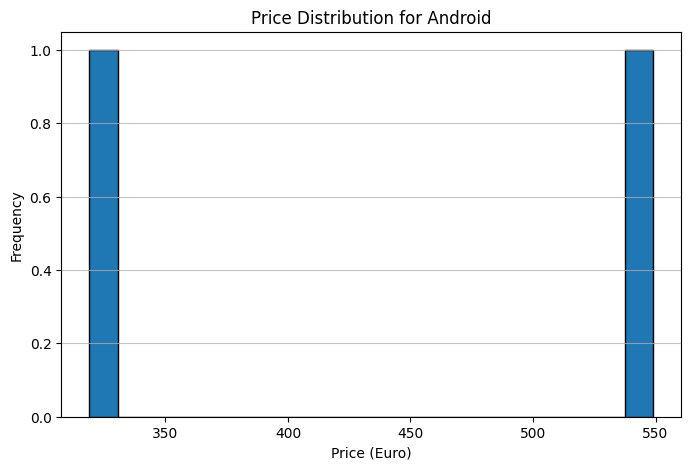

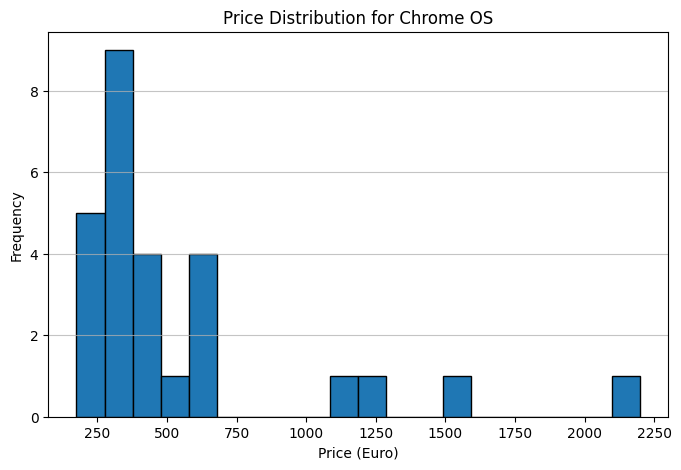

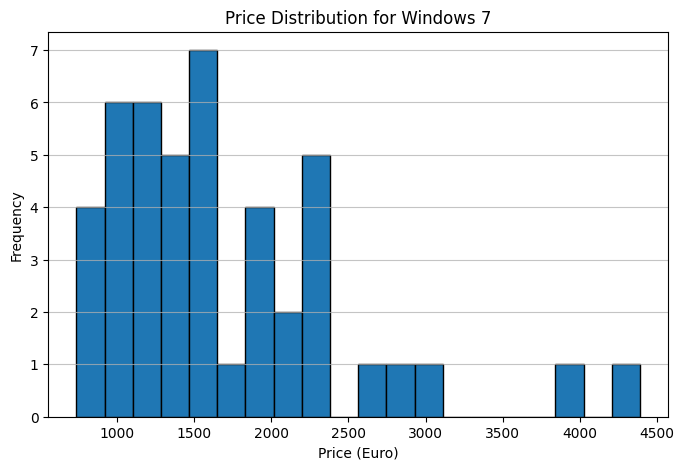

In [104]:
'''
Plot for each of the operating system types the distribution of the prices, so that the
number of plots equals to the number of unique operating systems.
'''
unique_os = df_fixed['OpSys'].unique()
for os in unique_os:
    os_prices = df_fixed[df_fixed['OpSys'] == os]['Price (Euro)']
    plt.figure(figsize=(8, 5))
    plt.hist(os_prices, bins=20, edgecolor='black')
    plt.title(f'Price Distribution for {os}')
    plt.xlabel('Price (Euro)')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()



What is the relationship between RAM and computer price? 

As the amount of RAM increases, the price of the laptop tends to rise.
This indicates that there is a positive correlation between the two variables.

RAM (GB)
8     613
4     367
16    198
6      35
12     25
32     17
2      16
24      3
64      1
Name: count, dtype: int64


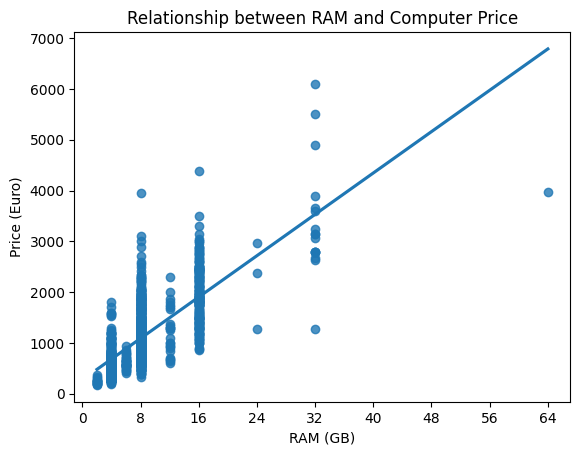

In [ ]:
# Plot that supports the finding about the relationship between the two variables
# Regression plot
print(df2['RAM (GB)'].value_counts())
sb.regplot(x=df2["RAM (GB)"], y=df2["Price (Euro)"], scatter=True, ci=None)
plt.title('Relationship between RAM and Computer Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.xticks(range(0,65,8))
plt.show()

In [113]:
'''
Create a new column for the dataframe called "Storage type" that extracts the
storage type from the column "Memory".
'''
df_fixed['Memory'].value_counts() # investigation of the different storage types


Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        124
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [ ]:
# implement a function to remove the irelevant values from the storage types
def extract_storage(memory):
    if '+' in memory: # for more than one storage type
        parts = memory.split('+') # Split the value into parts by '+'
        cleaned_parts = [part.split('B')[-1].strip() for part in parts] # remove sizes (like GB, TB) from each part
        return ' + '.join(cleaned_parts) # Join the cleaned parts with " + "
    
    else:
        # For single storage types remove the size and keep the type
        return memory.split(' ', 1)[1]

In [112]:
# implement the function on the new column
df_fixed['Storage type'] = df_fixed['Memory'].apply(extract_storage)
df_fixed['Storage type'].value_counts() # checking that the function works propperly

Storage type
SSD                    631
HDD                    358
SSD + HDD              200
Flash Storage           70
Hybrid                   8
SSD + SSD                4
SSD + Hybrid             2
Flash Storage + HDD      1
HDD + HDD                1
Name: count, dtype: int64

Question 3
Think of additional questions related to this data. What types of analyses and
visualizations would you use to address them? Select two questions from your list and
implement. 
* Submit your list of questions, suggested analyses and visualizations and the
implementation.

Questions That Can Be Analyzed Using the Data:
1. What is the relationship between screen size and a laptop's weight?
This analysis can be presented as a scatter plot to examine the correlation between the two variables.

2. How do laptop types vary across different price ranges?
This analysis can be implemented using a bar chart that represents the distribution of different laptop types across various price ranges.

3. Is there a correlation between screen resolution and GPU type?
To address this question, a scatter plot can be used.

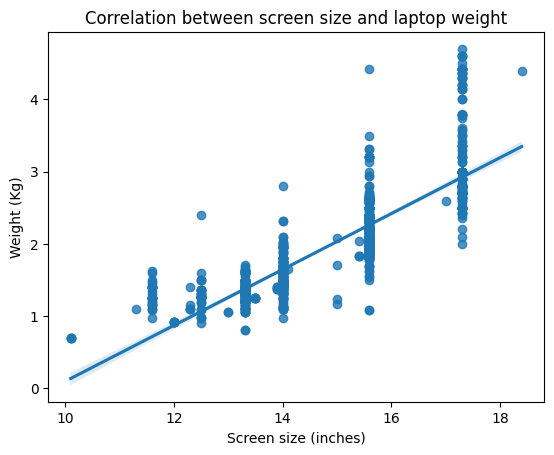

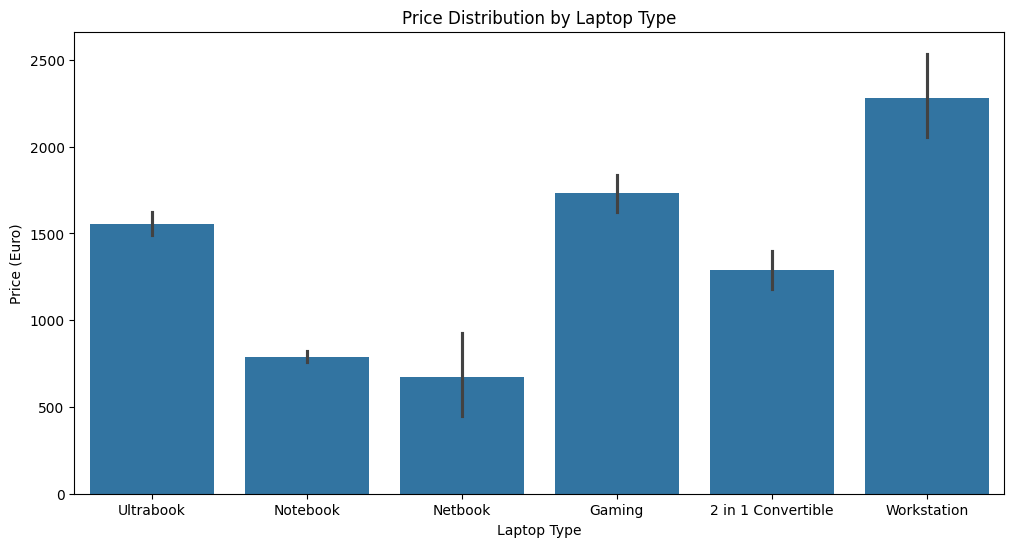

In [128]:
# Implementation of two questions:
'''
Question 1: What is the relationship between screen size and laptop's weight?
'''
sb.regplot(x=df_fixed['Inches'], y=df_fixed['Weight (kg)'], data=df_fixed)
plt.title('Correlation between screen size and laptop weight')
plt.xlabel('Screen size (inches)')
plt.ylabel('Weight (Kg)')
plt.xticks(rotation=0)
plt.show()
'''
Question 2: How laptop types vary across the different prices?
'''
plt.figure(figsize=(12, 6))
sb.barplot(x='TypeName', y='Price (Euro)', data=df_fixed)
plt.title('Price Distribution by Laptop Type')
plt.xlabel('Laptop Type')
plt.ylabel('Price (Euro)')
plt.xticks(rotation=0)
plt.show()